In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import cmath
import math
from pylab import *
from matplotlib import rc, rcParams
import pandas as pd


In [2]:
# Asigning the Initial Condition
l0=.5
x0=.25
k=12
e_D=1.9
e_C=.9

rho_0=np.zeros(int(7), dtype=float)

rho_0[0]=x0*x0*(1-l0)
    
rho_0[1]=x0*x0*l0 
    
rho_0[2]=(1-x0)*(1-x0)*(1-l0) 
    
rho_0[3]=(1-x0)*(1-x0)*l0
    
rho_0[4]=2*x0*(1-x0)*l0 

rho_0[5]=2*x0*(1-x0)*(1-l0)
    
rho_0[6]=(2/3)*(1-e_C)

print(sum(rho_0[0:6])) 

1.0


In [3]:
# numerical integration of differential equations using odein

rho_a_p=[]
rho_b_p=[]
rho_c_p=[]
rho_d_p=[]
rho_e_p=[]
rho_f_p=[]
rho_R_p=[]



 
def solution(rho, t):

    rho_dot = np.zeros(7, dtype=float)
#     R=.3
    R=rho[6]/(1-e_C)
 
    khi = rho[0]+ rho[1]+ rho[4]/2+ rho[5]/2
    phi = rho[2]+ rho[3]+ rho[4]/2+ rho[5]/2
            
            
    rho_dot[0] = -rho[0] + (k-1) * \
                     (-(R/khi)*(rho[0]+rho[4])*rho[0] + ((1-R)/(2*phi))*(rho[2]+rho[4]/2)*rho[5])


    rho_dot[1] = (1-R)*rho[0] + ((1-R)/2)*rho[4] + (k-1)* \
                     (-(R/khi)*(rho[0]+rho[4])*rho[1]+ ((1-R)/(2*phi))*(rho[2]+rho[4]/2)*rho[4])


    rho_dot[2] =  -rho[2] + (k-1) * \
                    ((R/(2*khi))*(rho[0]+rho[4])*rho[5] - ((1-R)/phi)*(rho[2]+rho[4]/2)*rho[2])


    rho_dot[3] = R*rho[2] + R*rho[4]+ (k-1) * \
                      ((R/(2*khi))*(rho[0]+rho[4])*rho[4] - ((1-R)/phi)*(rho[2]+rho[4]/2)*rho[3])


    rho_dot[4] = -rho[4] + (k-1)*\
            ((R/khi)*(rho[0]+rho[4])*(rho[1]-rho[4]/2)+((1-R)/phi)*(rho[2]+rho[4]/2)*(rho[3]-rho[4]/2) )

    rho_dot[5] = R*rho[0] + (1-R)*(rho[2]+rho[4]/2)+(k-1)*\
            ((R/khi)*(rho[0]+rho[4])*(rho[0]-rho[5]/2)+((1-R)/phi)*(rho[2]+rho[4]/2)*(rho[2]-rho[5]/2) )


    rho_dot[6] = rho[6]*(1-rho[6])-rho[6]*(e_C*khi+e_D*phi)

        
    return  rho_dot.tolist()
    
    
    
t=np.linspace(0,170,17000)

X=odeint(solution, rho_0, t)
tt=len(t)



np.savetxt("ER.txt", X)

    

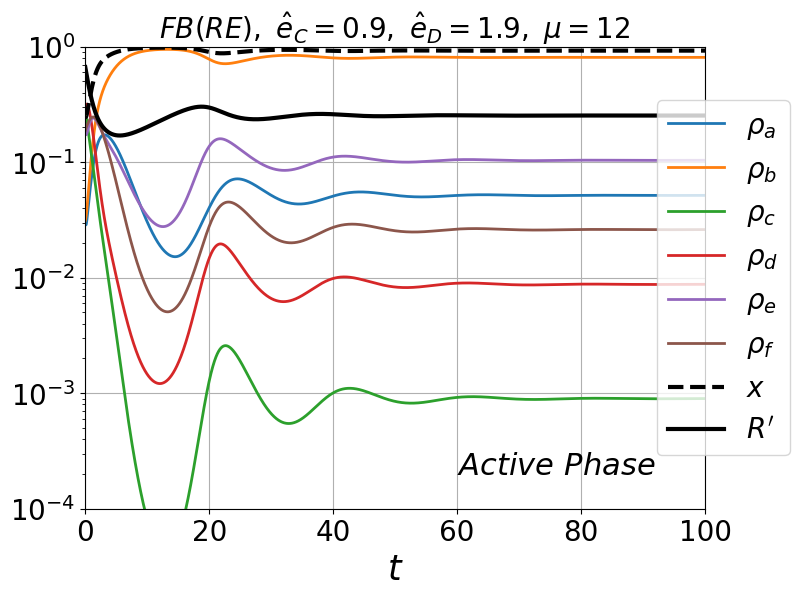

In [5]:
# Plotting the trajectories of the dynamics


f=figure(figsize=(8,6))

Probability = np.arange(0.05, 1, .05)

rho_e_p_MF=np.loadtxt("ER.txt")

plt.plot(t,rho_e_p_MF[:,0], lw=2, label="$\\rho_a$ ")
plt.plot(t,rho_e_p_MF[:,1], lw=2, label="$\\rho_b$ ")
plt.plot(t,rho_e_p_MF[:,2], lw=2, label="$\\rho_c$ ")
plt.plot(t,rho_e_p_MF[:,3], lw=2, label="$\\rho_d$ ")
plt.plot(t,rho_e_p_MF[:,4], lw=2, label="$\\rho_e$ ")
plt.plot(t,rho_e_p_MF[:,5], lw=2, label="$\\rho_f$ ")
x=((rho_e_p_MF[:,0]+rho_e_p_MF[:,1]+.5*rho_e_p_MF[:,4]+.5*rho_e_p_MF[:,5]))

plt.plot(t,x, '--',color="k", lw=3, label="$x$" )
plt.plot(t,rho_e_p_MF[:,6]/(1-e_C), color="k", lw=3, label="$R'$" )

plt.xlim(-0.05 , 100)
plt.ylim(0.0001 , 1)
# plt.text(60, .0002, r'$Active \ Phase$', fontsize=22)
plt.yscale("log")
plt.xlabel('$t$', fontsize=25)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.title('$FB (RE), \ \hat{e}_C=%.1f, \ \hat{e}_D=%.1f, \ \\mu=%s$' % (e_C,e_D,k),fontsize=20)
plt.grid(True)
plt.legend(fontsize=20,loc='center left', bbox_to_anchor=(.9, 0.5))



# plt.savefig('Sus_RE_%.1f_%.1f_%.1f.eps' % (k,e_C,e_D), format='eps')
